<a href="https://colab.research.google.com/github/diogorjs/we_love_data/blob/master/Modulo_1_Projeto_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Airbnb - Rio de Janeiro**

Neste projeto iremos analisar os dados referentes à cidade do Rio de Janeiro e ver quais insights podem ser extraídos a partir dos dados brutos.

### **1. Obtenção dos dados:** 

#### O Airbnb disponibiliza uma grande base de dados para análise. A mesma pode ser encontrada em [Inside Airbnb](http://insideairbnb.com/). Para este exercício iremos utilizar o dataset **listings.csv** para a cidade do Rio de Janeiro.

*   listings.csv: Summary information and metrics for listings in Rio de Janeiro (good for visualisations).



In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo para um Dataframe
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-11-22/visualisations/listings.csv")
df.head(n=5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,332,4,243,2019-11-11,2.13,1,303
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,235,2019-10-08,2.04,3,119
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,273,2,271,2019-11-21,2.38,1,88
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,378,2,169,2019-11-13,2.28,1,85
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,130,3,316,2019-11-16,2.84,1,128


### **2. Análise dos dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.



#### **Dicionário de dados**

* id: Número gerado para identificar o imóvel
* name: Nome da propriedade anunciada
* host_id: Número do proprietário do imóvel anunciado
* host_name: Nome do proprietário do imóvel anunciado
* neighbourhood_group: Esta coluna não possui nenhum valor válido
* neighbourhood: Bairro onde está situado o imóvel
* latitude: Coordenadas de Latitude do imóvel
* longitude: Coordenadas de Longitude do imóvel
* room_type: Tipo do imóvel a ser alugado
* price: Preço do aluguel por dia
* minimum_nights: Quantidade mínima de noites que deve ser alugado
* number_of_reviews: Número de avaliações realizadas por clientes
* last_review: Data da última avaliação realizada por um cliente
* reviews_per_month: Quantidade de avaliações por mes
* calculated_host_listings_count: Quantidade de imóveis do mesmo dono
* availability_365: Quantidade de dias que o imóvel esta disponível durante o ano

In [0]:
df.head(n=5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,332,4,243,2019-11-11,2.13,1,303
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,235,2019-10-08,2.04,3,119
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,273,2,271,2019-11-21,2.38,1,88
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,378,2,169,2019-11-13,2.28,1,85
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,130,3,316,2019-11-16,2.84,1,128


#### **Q1: Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [0]:
# Identifica o volume de dados do dataframe
print("Linhas (Entradas):\t {}".format(df.shape[0]))
print("Colunas:\t {}\n".format(df.shape[1]))

display(df.dtypes)

Linhas (Entradas):	 33715
Colunas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#### **Q2: Qual é a porcentagem de valores ausentes no Dataset?**

In [0]:

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.432033
last_review                       0.432033
name                              0.001809
host_name                         0.000593
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

#### **Q3: Qual é o tipo de distribuição das variáveis?**

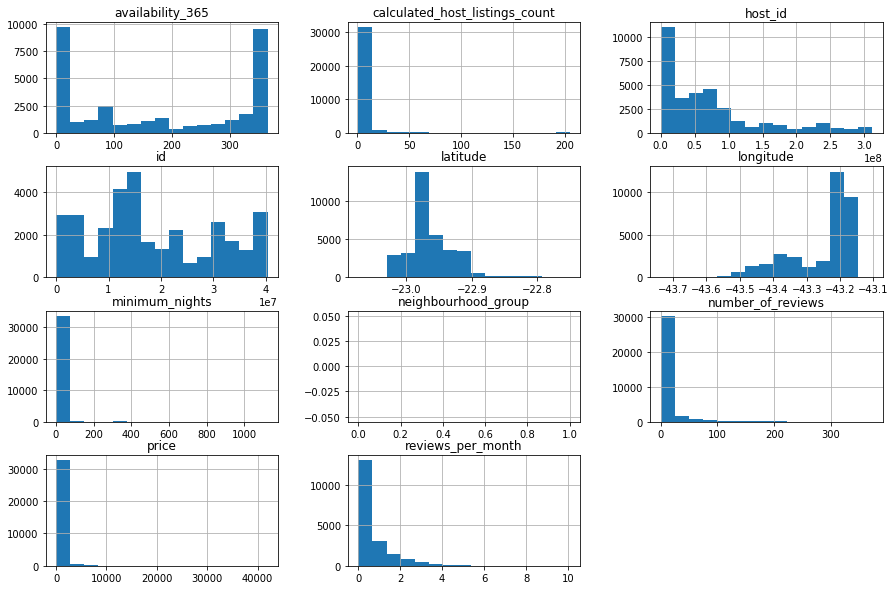

In [0]:
# plotar os dados em formato de histograma para verificar a distribuição dos dados
df.hist(bins=15, figsize=(15,10));

#### **Q4: Existem outliers no conjunto de dados?**

Pela distribuição do histograma é possível verificar indícios de outliers. Olhe por exemplo as variáveis price, minimum_nights.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica, para confirmar existem duas maneiras rápidas que auxiliam na detecção de outliers. São elas

* resumo estatístico por meio do método descrive()
* plotar o boxplot para a variável

In [0]:
# informações estatisticas
df[['price', 
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month', 
    'calculated_host_listings_count',
    'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,33715.000000,33715.000000,33715.000000,19149.000000,33715.000000,33715.000000
mean,651.860537,4.789826,9.374344,0.707232,5.996292,177.956251
std,1695.447098,22.640328,24.815311,0.927453,20.303420,149.766863
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,151.000000,1.000000,0.000000,0.110000,1.000000,0.000000
50%,290.000000,2.000000,1.000000,0.340000,1.000000,165.000000
75%,600.000000,4.000000,6.000000,0.980000,3.000000,350.000000
max,41982.000000,1123.000000,372.000000,10.080000,205.000000,365.000000


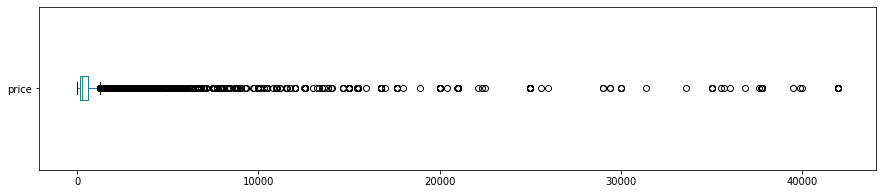

In [0]:
# Boxplot para variável price
df.price.plot(kind='box', vert=False, figsize=(15,3));

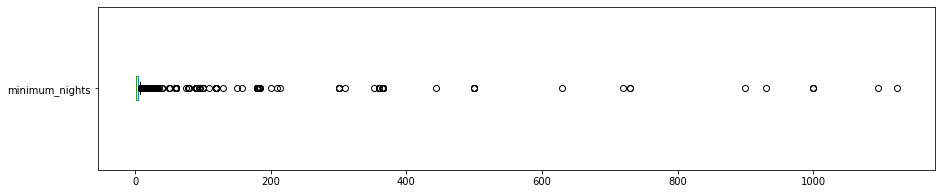

In [0]:
# Boxplot para variável minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));

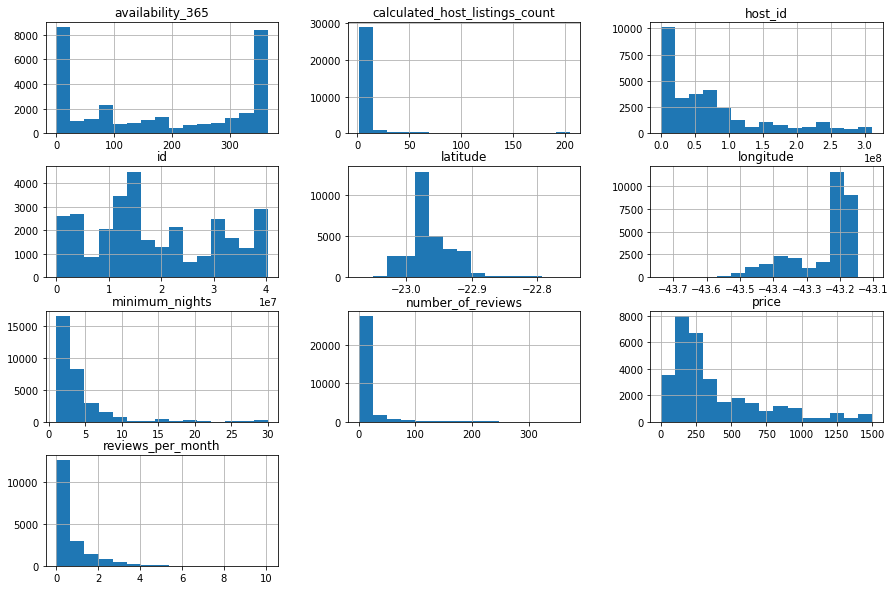

In [0]:
# Histograma sem outliers

# Criando uma cópia do dataframe para não alterar o original
df_clean = df.copy()

# Removendo valores de price maiores que 1500
df_clean.drop(df_clean[df_clean.price > 1500].index, axis = 0, inplace = True)

# Removendo valores de minimum_nights maiores que 30
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

# Removendo neighbourhood_group pois está vazio
df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

df_clean.hist(bins=15, figsize=(15,10));

#### **Q5: Qual é a correlação entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando a relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as corelações existentes entre as variáveis de interesse podemos:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [0]:
# Criando a matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.200959,-0.172476,-0.187294,0.025147,-0.008445
minimum_nights,0.200959,1.000000,-0.091746,-0.145355,-0.041749,-0.020394
number_of_reviews,-0.172476,-0.091746,1.000000,0.576863,-0.030317,0.019151
reviews_per_month,-0.187294,-0.145355,0.576863,1.000000,-0.021361,-0.032180
calculated_host_listings_count,0.025147,-0.041749,-0.030317,-0.021361,1.000000,0.080847
availability_365,-0.008445,-0.020394,0.019151,-0.032180,0.080847,1.000000


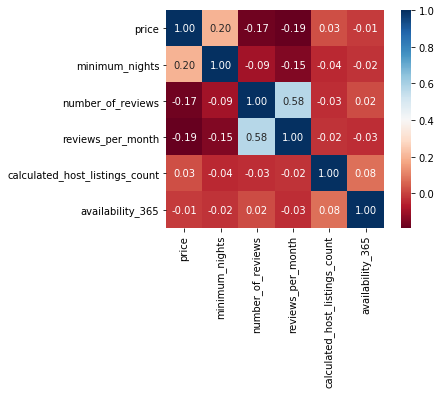

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

#### **Q6: Qual é tipo de imóvel mais alugado no Airbnb??**

A coluna da variável room_type indica o tipo de locação que está anunciada no Aisbnb. Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts

In [0]:
df_clean.room_type.value_counts()

Entire home/apt    21483
Private room        8592
Shared room          698
Hotel room           297
Name: room_type, dtype: int64

In [0]:
(df_clean.room_type.value_counts() / df_clean.shape[0])*100

Entire home/apt    69.143869
Private room       27.653685
Shared room         2.246540
Hotel room          0.955906
Name: room_type, dtype: float64

#### **Q7: Qual localidade mais cara no Rio de janeiro??**

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Engenheiro Leal           1499.000000
Vaz Lobo                  1024.500000
Ricardo de Albuquerque     639.250000
Vicente de Carvalho        623.333333
Complexo do Alemão         520.500000
Jacarepaguá                505.745884
Barra da Tijuca            500.909345
Lagoa                      500.902439
Guaratiba                  498.900000
Leblon                     487.736880
Name: price, dtype: float64

In [0]:
# quantidade de imóveis por região
df_clean.groupby(['neighbourhood']).id.count().sort_values(ascending=False)

neighbourhood
Copacabana         8081
Barra da Tijuca    3221
Ipanema            2648
Jacarepaguá        1822
Botafogo           1604
                   ... 
Engenheiro Leal       1
Coelho Neto           1
Colégio               1
Vila Militar          1
Parque Colúmbia       1
Name: id, Length: 152, dtype: int64

In [0]:
# Ver quantidade de imóveis no Complexo do Alemão
print(df[df.neighbourhood == "Engenheiro Leal"].shape)

(1, 16)


In [0]:
df[df.neighbourhood == "Engenheiro Leal"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24118,26996243,Engenheiro Leal Casa,159787826,Antonio,NaN,Engenheiro Leal,-22.87497,-43.32121,Entire home/apt,1499,15,0,NaN,NaN,2,365


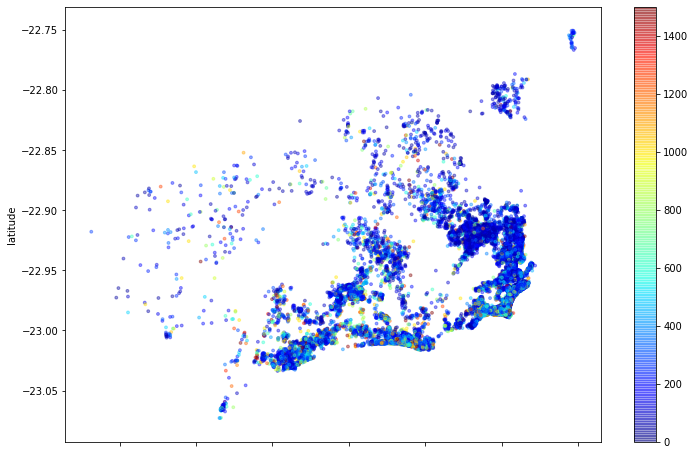

In [0]:
#Plotando os imóveis pela Latitude e Longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', 
              alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [0]:
corr = df_clean[['price','minimum_nights']].corr()
display(corr)

,price,minimum_nights
price,1.000000,0.200959
minimum_nights,0.200959,1.000000
